In [87]:
import json

with open("scripts/raw_data/three_minutes_tweets.json.txt") as f:
    tweets = [json.loads(line) for line in f]

In [3]:
len(tweets)

8299

проверим что все строки -- создание или удаление твитов

In [6]:
n_creates = 0
n_deletes = 0
for tweet in tweets:
    if "created_at" in tweet:
        n_creates += 1
    elif "delete" in tweet:
        n_deletes += 1
    else:
        print("unknown type", tweet)

print(n_creates, n_deletes)    

7338 961


посмотрим, откуда можно взять значение country_code и location

In [11]:
for tweet in tweets:
    if "geo" in tweet and tweet["geo"] is not None:
        pprint(tweet["geo"])
        break
        
for tweet in tweets:
    if "place" in tweet and tweet["place"] is not None:
        pprint(tweet["place"])
        break

{'coordinates': [-33.025606, -71.546977], 'type': 'Point'}
{'attributes': {},
 'bounding_box': {'coordinates': [[[-71.5898331, -33.1045519],
                                   [-71.5898331, -32.9481633],
                                   [-71.4414593, -32.9481633],
                                   [-71.4414593, -33.1045519]]],
                  'type': 'Polygon'},
 'country': 'Chile',
 'country_code': 'CL',
 'full_name': 'Viña del Mar, Valparaíso',
 'id': '008be613029d4ca5',
 'name': 'Viña del Mar',
 'place_type': 'city',
 'url': 'https://api.twitter.com/1.1/geo/id/008be613029d4ca5.json'}


In [11]:
with open("scripts/raw_data/AFINN-111.txt") as f:
    word_ratings = [line.split('\t') for line in f]
    word_ratings = {word[0]: int(word[1]) for word in word_ratings} 

In [84]:
import re
from collections import Counter

def prepare_text(text):
    return Counter(re.findall(r'\w{3,}', text.lower()))

def rate(words):
    score = 0
    for word, n_occurencies in words.items():
        score += word_ratings.get(word, 0) * n_occurencies
    return score

In [95]:
texts = [tweet["text"] for tweet in tweets if tweet.get("lang") == "en"]
rates = [rate(prepare_text(text)) for text in texts]

(array([1.900e+01, 6.300e+01, 3.310e+02, 1.536e+03, 6.810e+02, 2.180e+02,
        4.600e+01, 1.500e+01, 5.000e+00, 1.000e+00]),
 array([-10. ,  -7.3,  -4.6,  -1.9,   0.8,   3.5,   6.2,   8.9,  11.6,
         14.3,  17. ]),
 <a list of 10 Patch objects>)

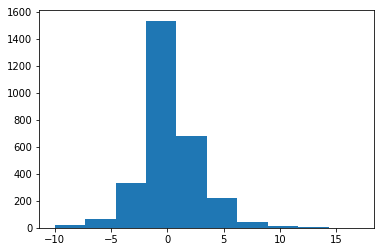

In [98]:
import matplotlib.pyplot as plt

plt.hist(rates)

In [101]:
for i in range(len(texts)):
    if rates[i] < -8:
        print(rates[i], texts[i])

-9 A line? A motherfucking line!? Don't these people know who the fuck I am?… https://t.co/FlPD6nlLD0
-9 Watch the full video: http://t.co/aKeaV066AA
Cock hungry girlfriend gets fucked and creamed http://t.co/ZYhvrsaz4j
-9 RT @travis_txst: Can't wait to hear all of these freshman bitch about their dorms/roommates... They ain't got shit on my stories 😂
-10 RT @ItsSTIR: EXACTLY! Sad. Damned if we do, damned if we dont RT @supermanhotmale See how they operate? http://t.co/yjdlBi6DEu
#TeenMentors…
-9 @zenmachinegun oh is it. fuck buying that just now anyway, retarded pricing. was it really that bad?
-9 Walk onto our side, especially as we are crying out for an actual centre half of his mould since losing Vidic. Madness! Daley Blind it is.
-9 @vianeybobadilla stfu witcho bitch ass
-9 @NASCAR THIS PACKAGE SUCKS THIS PACKAGE SUCKS THIS PACKAGE SUCKS #NASCAR #PureMichigan400
-9 I'm crying😭

DO NOT FUCKING LITTER

IT IS SO EASY TO THROW SHIT AWAY WHERE IT BELONGS https://t.co/zxKskptaf7
-10 RT 

In [103]:
for i in range(len(texts)):
    if rates[i] > 10:
        print(rates[i], texts[i])

17 dear @Harry_Styles you're so amazing, so kind, so beautiful, I’m so lucky to have you in my life.
Mind following me?⋆*
All the love x
30,052
11 @HunterHaleyKing I am so glad we finally got to meet! I have been a fan for a long time! Stay sweet &amp; beautiful! 😉 http://t.co/zjcJQAy5lE
12 RT @MorganSmith15: Barkley had a really good day.. Nelson rookie from USC was outstanding. All in one preseason game. It was a fun one even…
14 RT @BeaMiller: WAIT I WON A TEEN CHOICE AWARD THATS AWESOME YOU GUYS ARE THE BEST ps where am i going to fit a large surfboard in my home I…
11 @zaynmalik 
Hey baby how are u ?😘
Hope you're well 😄♥
I love u so so much ❤
Can u follow me please ? 😣
I always love &amp; support u 😍😍😍😍 ♥
x442
12 RT @kushlovatos: Ariana: Great vocals 
Demi: Power vocals
Miley: Great music videos
Taylor: Good sales
Selena: Good night ya'll
11 hii @Harry_Styles, thank you for making this world such a lovely place, you deserve everything great! Mind following me? Love you ♡ x126,443
